# ICA2: Noise & Kurtosis

DataFun

Members:
Jan Botscch, Fabian Frank, David Munkacsi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 6.1 Natural Gradient

In [2]:
#defines
samplerate = 8192
N = 3
p = 18000

## Load sounds and create noise source

In [3]:
#load the data
dataSet1 = np.loadtxt('./sounds/sound1.dat')
dataSet2 = np.loadtxt('./sounds/sound2.dat')
s = np.stack([dataSet1, dataSet2], axis=0)

#create noise data sampled from a Gaussian
mean_data = np.mean(s,axis=1, keepdims=True)
std_data = np.std(s,axis=1, keepdims=True)
dataSet3a = np.random.normal(np.mean(mean_data), np.mean(std_data), p);

#create noise data sampled from a Laplacian
dataSet3b = np.random.laplace(0, 1, p);

#combine the data and the noise
s1 = np.vstack([s, dataSet3a])
s2 = np.vstack([s, dataSet3b])

## Mix the sounds and Preprocess for ICA

In [4]:
# create random and invertible NxN (3x3) matrix
while True:
    A = np.random.rand(N,N)
    if np.linalg.det(A) != 0.0:
        break
print("A=" + str(A))

#mix the sources
x1 = np.matmul(A, s1)
x2 = np.matmul(A, s2)

# remove temporal structure by permutation
permutation = np.random.permutation(range(0,p))
x_per1 = x1[:, permutation]
x_per2 = x2[:, permutation]

#center the permuted data
mean1 = np.mean(x_per1,axis=1, keepdims=True)
x_per_cent1 = x_per1 - mean1;
mean2 = np.mean(x_per2,axis=1, keepdims=True)
x_per_cent2 = x_per2 - mean1;

#center the non-permuted data
x_cent1 = x1 - np.mean(x1,axis=1, keepdims=True)
x_cent2 = x2 - np.mean(x2,axis=1, keepdims=True)


#initialize W at random
while True:
    W_init = np.random.rand(N,N)
    if np.linalg.det(W_init) != 0.0:
        break
print("W_init=" + str(W_init))

A=[[ 0.93477597  0.15929192  0.99995589]
 [ 0.57333427  0.67736432  0.94773365]
 [ 0.17935773  0.81833319  0.94333614]]
W_init=[[ 0.11756889  0.76223121  0.37981554]
 [ 0.32394028  0.98141359  0.48163759]
 [ 0.73930562  0.41624836  0.48949833]]


## Perform ICA with decaying conversion rate

In [5]:
#function that calculates f''/f'
def stepSigmoid(y):
    return 1 - 2 * (1 / (1 + np.exp(-y)))

#vectorize function
vStepSigmoid = np.vectorize(stepSigmoid)

def perform_ica(x, W, eps=0.1, f_decay = 0.9995):
    #perform ica
    eps_curr = eps
    convSpeed = np.empty([0,2])
    #for i in range(0,p):
    i=0
    cnt = 0;
    while eps_curr > 0.0000001:
        #natural gradient
        unmixed = np.dot(W,x[:,i])
        dW = np.dot(np.eye(N) + np.outer(vStepSigmoid(unmixed),unmixed), W)
        W = W + eps_curr * dW
        eps_curr = eps_curr * f_decay
        i = (i+1) % p
        cnt = cnt + 1
    return (W, cnt)

W1, iter1 = perform_ica(x_per_cent1, W_init)
print("Iterations=" + str(iter1))
print("Gaussian: W final=" + str(W1))

W2, iter2 = perform_ica(x_per_cent2, W_init)
print("Iterations=" + str(iter2))
print("Laplacian: W final=" + str(W2))

unmixedGaussian = np.matmul(W1, x_cent1)
unmixedLaplacian = np.matmul(W2, x_cent2)

Iterations=27625
Gaussian: W final=[[ 3.74434554 -7.94304159  5.87031173]
 [-4.28357248  8.10937821 -3.64186559]
 [ 1.80430155 -8.96432138  7.07410181]]
Iterations=27625
Laplacian: W final=[[ 4.21580704 -7.96805424  3.53774457]
 [-2.90789713  6.15020666 -4.55932772]
 [-1.84480075  9.0505542  -7.13873455]]


## Plot original, mixed and unmixed for Gaussian

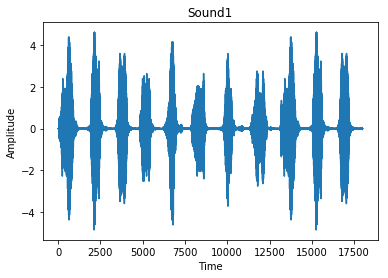

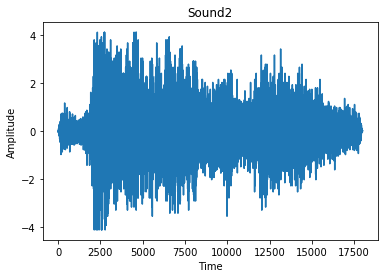

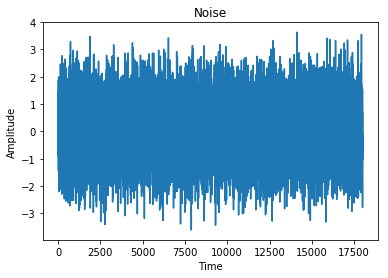

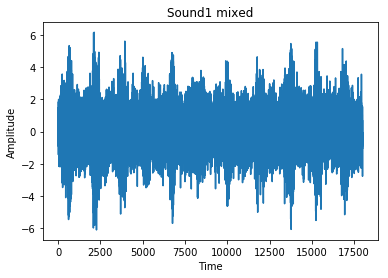

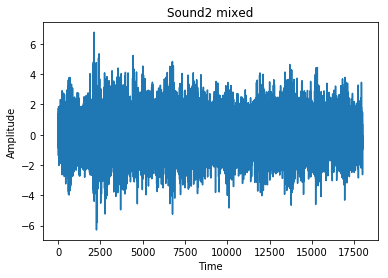

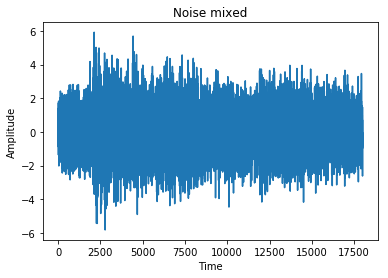

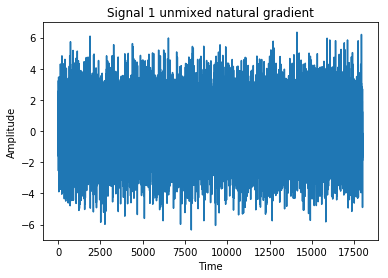

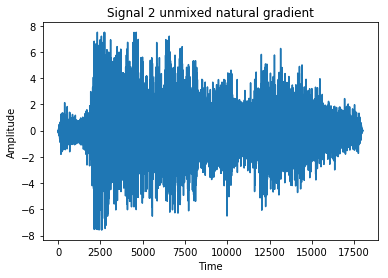

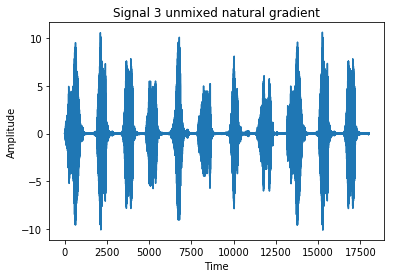

In [6]:
plt.figure()
plt.plot(dataSet1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1')
plt.figure()
plt.plot(dataSet2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2')
plt.figure()
plt.plot(dataSet3a)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise')

plt.figure()
plt.plot(x1[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 mixed')
plt.figure()
plt.plot(x1[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 mixed')
plt.figure()
plt.plot(x1[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise mixed')

plt.figure()
plt.plot(unmixedGaussian[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 1 unmixed natural gradient')
plt.figure()
plt.plot(unmixedGaussian[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 2 unmixed natural gradient')
plt.figure()
plt.plot(unmixedGaussian[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 3 unmixed natural gradient')

plt.show()

## Plot original, mixed and unmixed for Laplacian

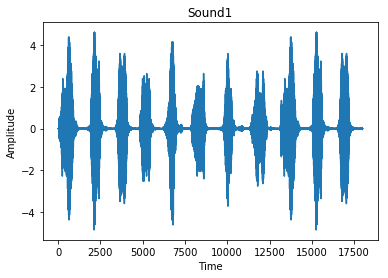

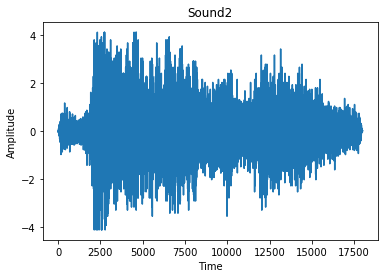

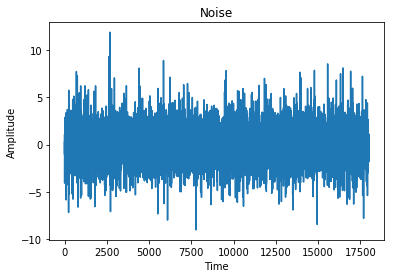

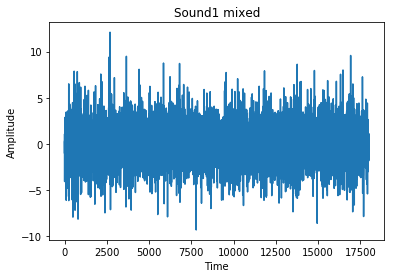

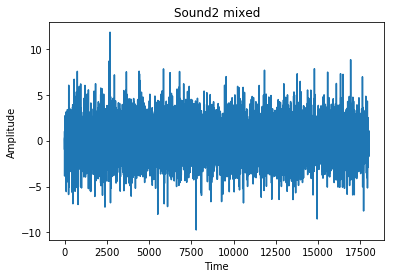

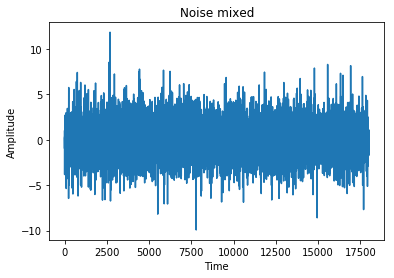

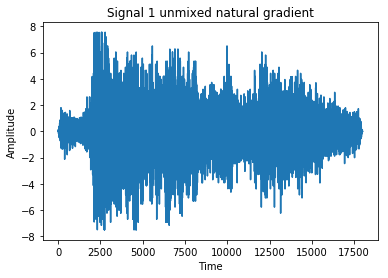

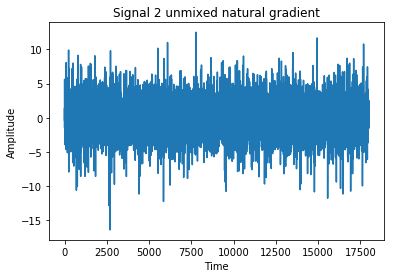

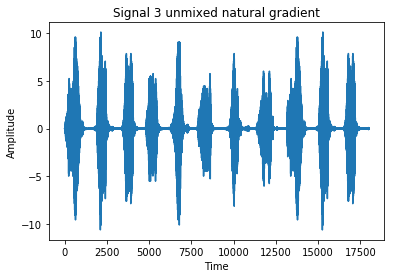

In [7]:
plt.figure()
plt.plot(dataSet1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1')
plt.figure()
plt.plot(dataSet2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2')
plt.figure()
plt.plot(dataSet3b)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise')

plt.figure()
plt.plot(x2[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 mixed')
plt.figure()
plt.plot(x2[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 mixed')
plt.figure()
plt.plot(x2[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise mixed')

plt.figure()
plt.plot(unmixedLaplacian[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 1 unmixed natural gradient')
plt.figure()
plt.plot(unmixedLaplacian[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 2 unmixed natural gradient')
plt.figure()
plt.plot(unmixedLaplacian[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 3 unmixed natural gradient')

plt.show()